In [8]:
# reference: https://github.com/djevans071/Iliad-battles/blob/c211976e4abf51d312ffd2c2b5b32dab288748e0/Iliad_battles.ipynb

%pylab inline
import pandas as pd
import re
import seaborn as sns
figsize(13,5)

sns.set_style('white')

df = pd.read_excel('data/Iliad_battles.xlsx', 0, encoding='utf-8')
# replace strange unicode whitespaces
df.replace(u'\xa0', u' ', regex=True, inplace=True)
df.head()


Populating the interactive namespace from numpy and matplotlib


,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...


In [9]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants.head()

0             Menelaos, son of Atreus
1           Antilochos, son of Nestor
2    Elephanor, leader of the Abantes
3         Aias (Ajax), son of Telamon
4              Antiphos, son of Priam
dtype: object

In [10]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants.head()


0             Menelaos, son of Atreus
1           Antilochos, son of Nestor
2    Elephanor, leader of the Abantes
3         Aias (Ajax), son of Telamon
4              Antiphos, son of Priam
dtype: object

In [11]:
c = []
for combatant in combatants:
    match_comma = re.search(r', ', combatant)
    # only split combatant name if there's a comma in it
    if match_comma:
        ci = combatant.split(',')[0]
        c.append(ci)

c[:5]
kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']


In [12]:
kills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...


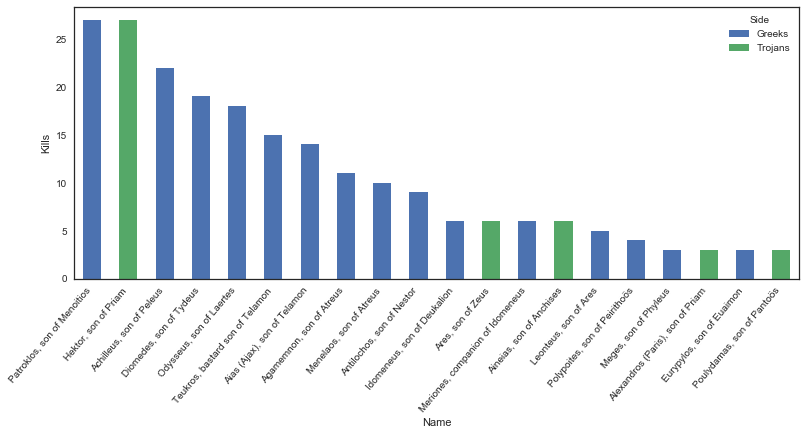

In [18]:

kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']

gkills = kills[kills.Winner.str.contains('G')]
g1 = gkills['Combatant1'][gkills.C1_Faction.str.contains('G')]
g2 = gkills['Combatant2'][gkills.C2_Faction.str.contains('G')]

gkill_list = pd.concat([g1,g2])


# create modified kill list for Greek faction
gkill_list = gkill_list.str.split('&', expand=True).apply(pd.Series,1).stack()
gkill_list = gkill_list.str.strip()
gkill_list.reset_index(drop=True, inplace=True)


# create kill list for Trojan faction
tkills = kills[kills.Winner.str.contains('T')]
t1 = tkills['Combatant1'][tkills.C1_Faction.str.contains('T')]
t2 = tkills['Combatant2'][tkills.C2_Faction.str.contains('T')]
tkill_list = pd.concat([t1,t2])

# plot rankings
tkill_list = tkill_list.str.split('&', expand = True).apply(pd.Series,1).stack()
tkill_list = tkill_list.str.strip()
tkill_list = tkill_list.reset_index(drop=True)


gkill_counts = gkill_list.value_counts().to_frame(name='kills')
gkill_counts['Side'] = 'Greeks'

tkill_counts = tkill_list.value_counts().to_frame(name='kills')
tkill_counts['Side'] = 'Trojans'

total_rankings=pd.concat([gkill_counts, tkill_counts])
total_rankings = (total_rankings.reset_index()
                  .rename(columns={'index':'Name'})
                  .sort_values('kills', ascending=False))

# create pivot table with the kills for the faction corresponding to the 
# name of the warrior. For purposes of coloring the plot
rankings = (total_rankings
            .sort_values('kills', ascending=False)
            .pivot(index='Name', columns='Side', values='kills'))

rankings.fillna(0, inplace=True)
rankings['tot'] = rankings['Greeks'] + rankings['Trojans']

(rankings.sort_values('tot', ascending=False)[['Greeks','Trojans']]
 .head(20).plot.bar(stacked=True))
xticks(rotation = 50, ha = 'right')
xlabel("Name")
ylabel("Kills")


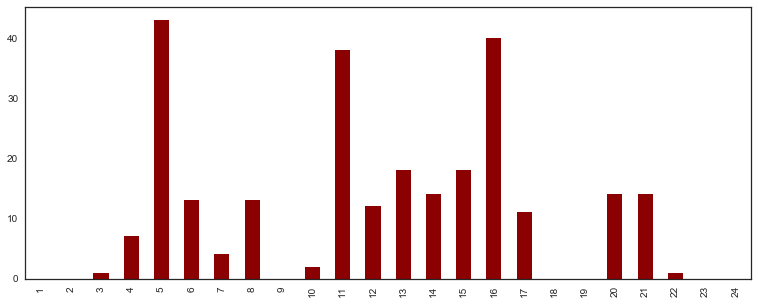

In [67]:
tot_lines = [0, 611, 877,461,544,909,
            529,482,565,714,579,
            848,471,837,522,725,
            867,761,617,417,503,
            611,516,898,804]

def line_ratio(lineloc):
    '''convert line locations into line ratios where 
    e.g. 1.5 refers to halfway through the first chapter'''
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    return chapter + line / tot_lines[chapter]

def total_lines(lineloc):
    ''' convert line location as a line of total lines in the poem'''
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    line += sum(tot_lines[:chapter-1])
    return line

df['line_ratios'] = df.Iliad_loc.apply(line_ratio)
df['line_position'] = df.Iliad_loc.apply(total_lines)

chapters = df.line_ratios.apply(floor).apply(int)
d = chapters.value_counts()
for i in range(1, 25):
    if i not in d.keys():
        d = d.set_value(i, 0)
d = d.sort_index()
d.plot.bar(stacked=True, color="darkred")